In [3]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, recall_score, precision_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('./data.csv')

y = data['Adj Close']
X = data.drop(columns=['Adj Close', 'Date', 'Open', 'Close', 'Low', 'High']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xg_reg = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, subsample=0.8, colsample_bytree=0.8)

xg_reg.fit(X_train_scaled, y_train)

y_pred = xg_reg.predict(X_test_scaled)

threshold = y_test.median()
y_test_binary = (y_test > threshold).astype(int)
y_pred_binary = (y_pred > threshold).astype(int)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

y_pred_binary = (y_pred > optimal_threshold).astype(int)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

f1 = f1_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R2 Score: {r2:.4f}')



Mean Squared Error: 2.4433
Mean Absolute Error: 1.1993
R2 Score: 0.9922


In [26]:
print(f'F1 Score: {f1:.4f}')
print(f'Recall Score: {recall:.4f}')
print(f'Precision Score: {precision:.4f}')

F1 Score: 0.9513
Recall Score: 0.9651
Precision Score: 0.9379


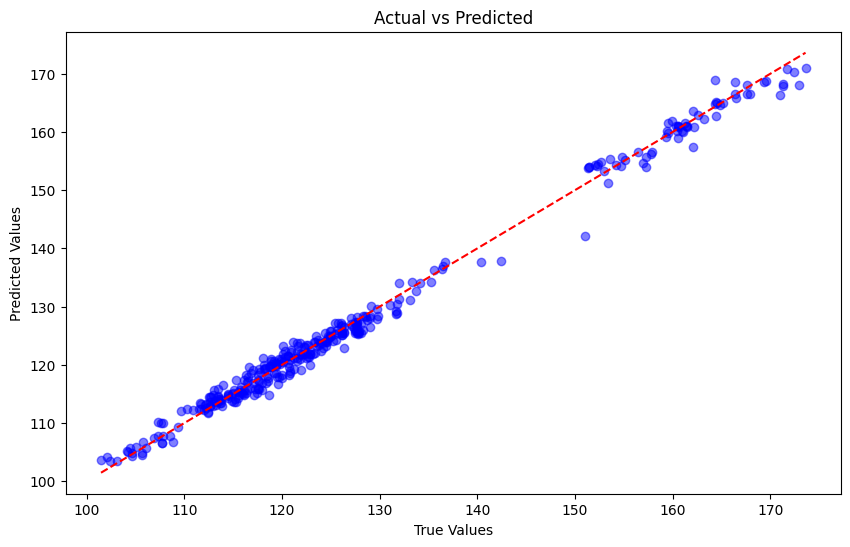

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Y = X doğrusu
plt.title('Actual vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

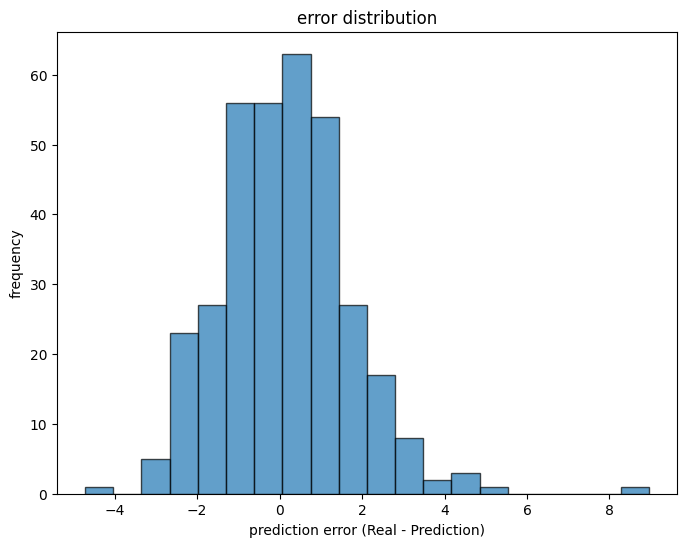

In [24]:
# Error calculation
residuals = y_test - y_pred

# Histogram: Error distribution
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel("prediction error (Real - Prediction)")
plt.ylabel("frequency")
plt.title("error distribution")
plt.show()

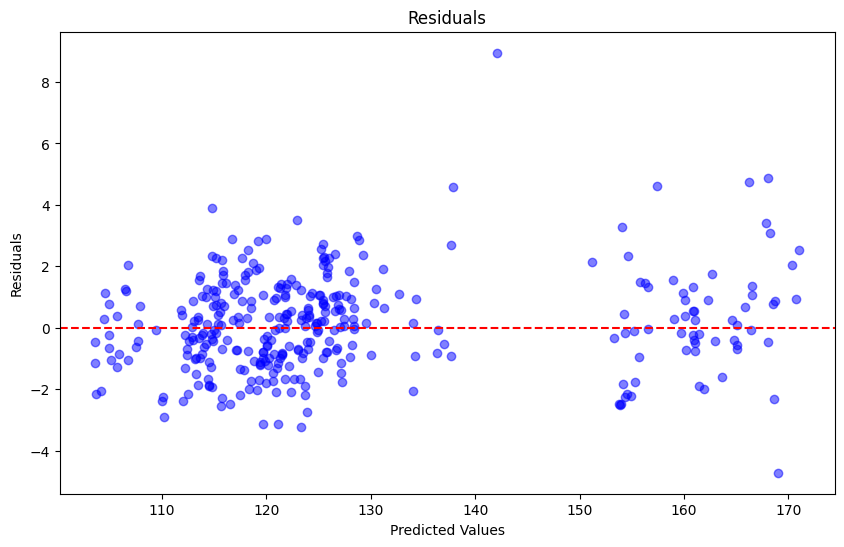

In [23]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='BLUE', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()